# Market Based Valuation 

#### Concepts : 
#####  Exchange-Traded Markets:



| Feature                        | Exchange-Traded Markets                                      | Over-the-Counter (OTC) Markets                                    |
|--------------------------------|-------------------------------------------------------------|-----------------------------------------------------------------|
| **Definition**                 | 💹 Financial markets where standardized instruments are traded. | 🔄 Decentralized markets where instruments are traded directly.    |
| **Instrument Types**           | 📈 Stocks, bonds, options, etc.                                  | 🛠 Customized instruments tailored to specific needs.              |
| **Standardization**            | 📏 Instruments are often standardized.                           | 🧩 Instruments are often customized.                               |
| **Trading Platform**           | 🏛 Centralized exchange with a formal structure.                 | 🌐 Direct trading between parties without a centralized exchange. |
| **Regulation**                 | 📜 Subject to strict regulatory oversight.                      | 🛡 Subject to regulations but may have less stringent oversight.   |
| **Flexibility**                | 🧊 Standardized contracts with less flexibility.                | 🤝 Highly flexible with customized terms and negotiations.        |
| **Liquidity**                  | 💧 Higher liquidity due to centralized trading.                 | 💨 Liquidity may vary as trading is decentralized.                |
| **Option Valuation**           | 📊 Transparent and standardized environment.                    | 🔄 Often involves more complex models due to customization.        |
| **Examples**                   | 🏦 New York Stock Exchange (NYSE), NASDAQ.                      | 🤝 Private trades, customized derivative contracts.      
own notebook!
##### Motivation for Option Valuation:

Understanding both exchange-traded and OTC markets is crucial for option valuation because:
- Different markets may have different conventions and practices affecting option pricing.
- Option pricing models need to be adapted based on whether the options are traded on an exchange or over-the-counter.
- Liquidity, transparency, and market structure differences can impact the valuation of options in ial scenarios.

### OPTIONS VALUATION : 

   
A financial option is a type of financial derivative that details a two-party contract for a future asset transaction at a predetermined price. The seller of the option bears the associated responsibility to complete the transaction, whereas the buyer just acquires the right, not the obligation, to participate in it. When options are first purchased, there is a cost involved, but when futures are first entered into, there is no cost to the seller or buyer.  

Options can be broadly classified into two categories: calls and puts. 

**Call Option:**
- The buyer of a call option holds the right, but not the obligation, to purchase a predetermined quantity (such as 100, 1000, etc.) of shares of the option at a specified price known as the 'strike price' before the expiration date.
- The seller, also known as the writer, is obligated to sell the underlying commodity or financial instrument if the buyer chooses to exercise the option.
- In exchange for this right, the buyer pays a fee referred to as the 'prem
  
**Put Option:**
- The purchaser of a put option possesses the right, without any obligation, to sell a specified quantity (e.g., 100, 1000, etc.) of shares of the asset at the predetermined 'strike price' before the expiration date.
- The seller of the put option, also known as the writer, is required to buy the asset at the strike price if the buyer decides to exercise the option.
- In consideration for this right, the buyer pays a fee known as the 'premiu



| Market Scenario | Action                   | Rule                                            | Reasoning                                                                                     |
|------------------|--------------------------|-------------------------------------------------|-----------------------------------------------------------------------------------------------|
| Bullish 🐂       | Consider Call Options   | If the price is expected to rise                | Call options provide the right to buy the asset at a specified price, allowing profit from appreciation. 📈  |
| Bearish 🐻       | Consider Put Options    | If the price is expected to fall                | Put options provide the right to sell the asset at a specified price, allowing profit from a declining market. 📉 |

🍐🐂🐻

**Inner value (or intrinsic value or payoff)**   
**Case** : European Call Option Inner Value Plot  

$$h_T(S, K) = \max(ST - K, 0)$$

where $T$ is the maturity date of the option, $S_T$ the index level at this date, and $K$ represents the strike price. We can now use Python for the first time and plot this inner value function. 📊



In [32]:

import numpy as np
import math
from scipy.integrate import quad
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family'] = 'Garamond'


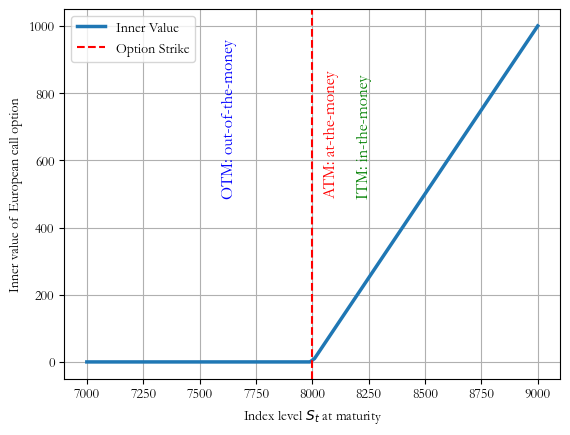

In [22]:

K = 8000
S = np.linspace(7000, 9000, 100)
h = np.maximum(S - K, 0)

plt.figure()
plt.plot(S, h, lw=2.5, label='Inner Value')

# Labels :  in-the-money (ITM), at-the-money (ATM), and out-of-the-money (OTM)
plt.axvline(x=K, color='r', linestyle='--', label='Option Strike')
plt.text(K + 50, 500, 'ATM: at-the-money', fontsize=12, color='r', rotation='vertical')
plt.text(K - 400, 500, 'OTM: out-of-the-money', fontsize=12, color='b', rotation='vertical')
plt.text(K + 200, 500, 'ITM: in-the-money', fontsize=12, color='g', rotation='vertical')

plt.xlabel('Index level $S_t$ at maturity')
plt.ylabel('Inner value of European call option')
plt.grid(True)
plt.legend()
plt.show()


Understanding whether an option is in-the-money, at-the-money, or out-of-the-money is crucial for options traders as it helps them assess the potential profitability of an option position and make informed decisions regarding buying, selling, or exercising options.

In [41]:
"""  Black-Scholes-Merton Parameters:
    ==========
    St: float
    stock/index level at time t
    K: float
    strike price
    t: float
    valuation date
    T: float
    date of maturity/time-to-maturity if t = 0; T > t
    r: float
    constant, risk-less short rate
    sigma: float
    volatility
    Returns
    =======
    call_value: float
    European call present value at t
    """

dN = lambda x: math.exp(-0.5 * x ** 2) / math.sqrt(2 * math.pi) # Probability density function of standard normal random variable X
N = lambda d: quad(lambda x: dN(x), -20, d, limit=50)[0]        # Cumulative density function of standard normal random variable X

d1f = lambda St, K, t, T, r, sigma: (math.log(St / K) + (r + 0.5 * sigma ** 2) * (T - t)) / (sigma * math.sqrt(T - t)) # Black-Scholes-Merton d1 function. 
# Evaluation of the european call option value.
BSM_call_value = lambda St, K, t, T, r, sigma: St * N(d1f(St, K, t, T, r, sigma)) - math.exp(-r * (T - t)) * K * N(d1f(St, K, t, T, r, sigma) - sigma * math.sqrt(T - t))


Text(0, 0.5, 'present value $C(t=0)$')

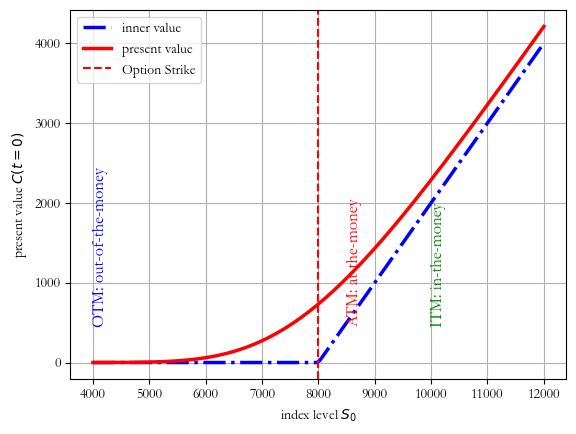

In [42]:
# Model and Option Parameters
K = 8000 # strike price
T = 1.0 # time-to-maturity
r = 0.025 # constant, risk-less short rate
vol = 0.2 # constant volatility
# Sample Data Generation
S = np.linspace(4000, 12000, 150) # vector of index level values
h = np.maximum(S - K, 0) # inner value of option
C = [BSM_call_value(S0, K, 0, T, r, vol) for S0 in S]
# calculate call option values
# Graphical Output
plt.figure()

plt.plot(S, h, 'b-.', lw=2.5, label='inner value')
# plot inner value at maturity
plt.plot(S, C, 'r', lw=2.5, label='present value')
# plot option present value

# Labels :  in-the-money (ITM), at-the-money (ATM), and out-of-the-money (OTM)
plt.axvline(x=K, color='r', linestyle='--', label='Option Strike')
plt.text(K + 500, 500, 'ATM: at-the-money', fontsize=12, color='r', rotation='vertical')
plt.text(K - 4000, 500, 'OTM: out-of-the-money', fontsize=12, color='b', rotation='vertical')
plt.text(K + 2000, 500, 'ITM: in-the-money', fontsize=12, color='g', rotation='vertical')
plt.grid(True)
plt.legend(loc=0)
plt.xlabel('index level $S_0$')
plt.ylabel('present value $C(t=0)$')